<a href="https://colab.research.google.com/github/TinizaraRodriguez/_paddleOCR/blob/main/_paddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install paddlepaddle paddleocr
!pip install opencv-python
!pip install paddlepaddle-gpu
!pip install paddleocr
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.5 MB/s eta 0:00:00


In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

--2023-10-08 16:42:06--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.81, 185.125.190.39, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  1.68MB/s    in 0.6s    

2023-10-08 16:42:07 (1.68 MB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’ saved [1128092/1128092]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like p

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47374, done.
remote: Counting objects: 100% (618/618), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 47374 (delta 389), reused 415 (delta 233), pack-reused 46756
Receiving objects: 100% (47374/47374), 345.16 MiB | 35.01 MiB/s, done.
Resolving deltas: 100% (33255/33255), done.


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import easyocr
import re
import regex

In [30]:
!rm -r /content/images



[2023/10/08 17:10:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_p

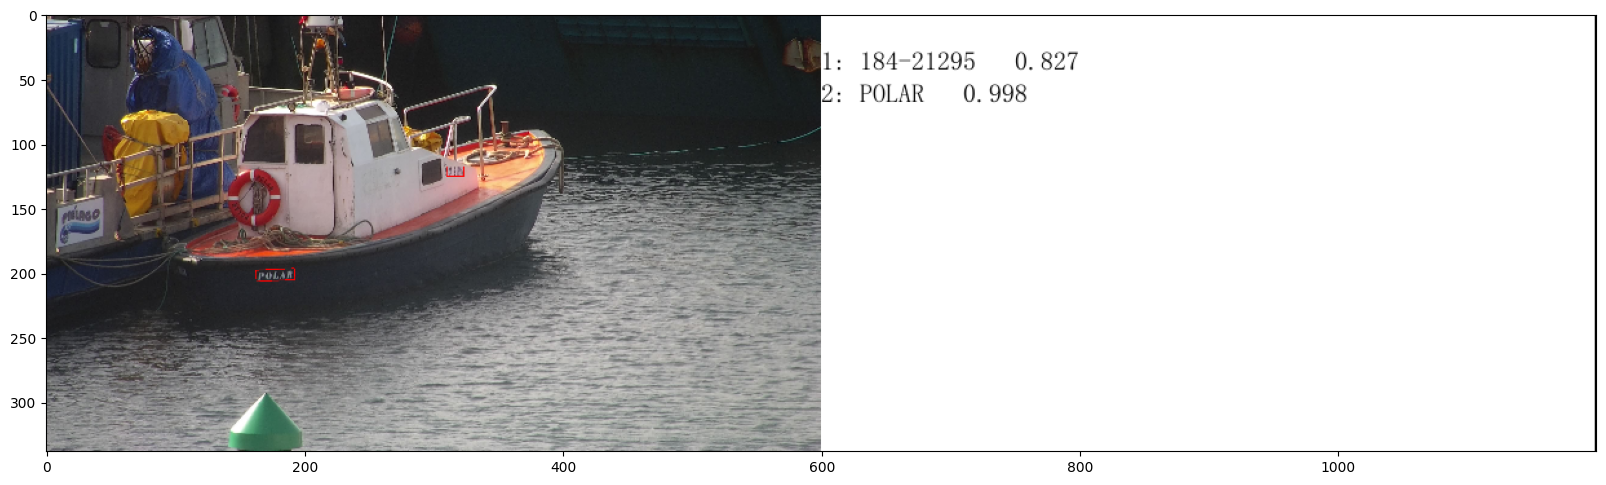

Imagen final guardada en: /content/outputs/output_barco_pesquero.jpg
[2023/10/08 17:10:15] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.04881596565246582
[2023/10/08 17:10:15] ppocr DEBUG: rec_res num  : 4, elapsed : 0.012146949768066406
[[[648.0, 163.0], [737.0, 111.0], [762.0, 153.0], [674.0, 206.0]], ('POLO07LH', 0.7475351691246033)]
[[[354.0, 425.0], [547.0, 407.0], [550.0, 441.0], [357.0, 459.0]], ('MARIAISABEL', 0.991107702255249)]
[[[482.0, 477.0], [583.0, 471.0], [585.0, 500.0], [484.0, 506.0]], ('ATORNTIG', 0.7284296154975891)]


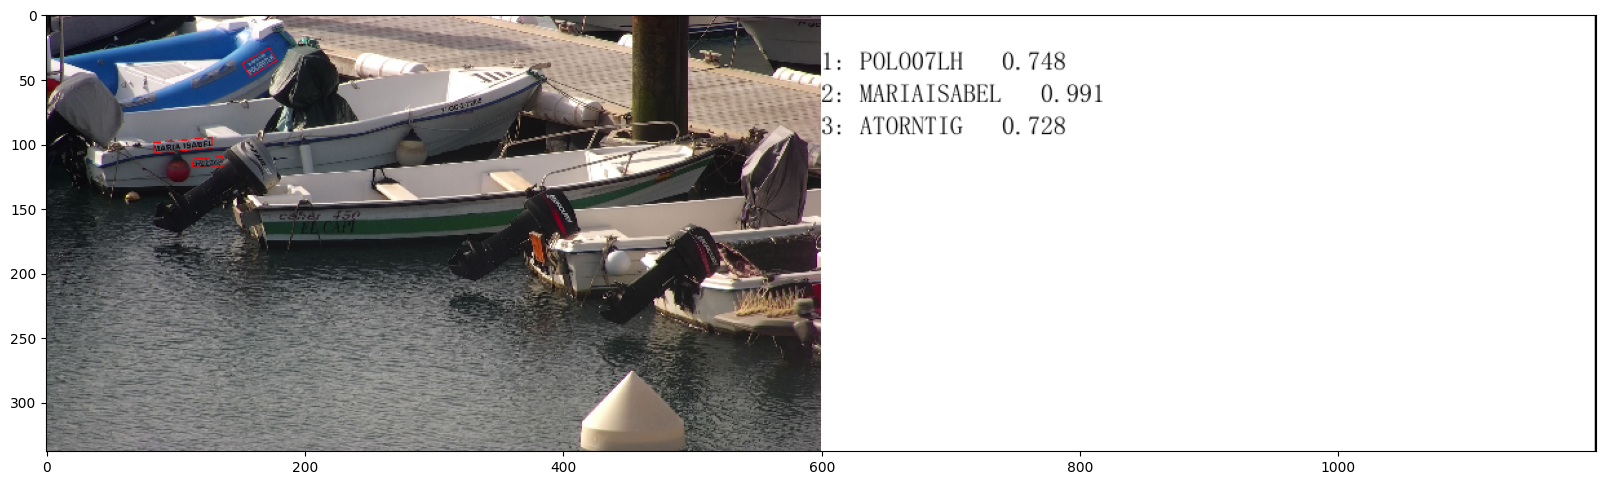

Imagen final guardada en: /content/outputs/output_pantalan_cerca.jpg


In [31]:
from paddleocr import PaddleOCR,draw_ocr
# Configuración de PaddleOCR
ocr = PaddleOCR(lang='es')

# Ruta de la carpeta de imágenes
input_folder = '/content/images'

# Obtener la lista de archivos en la carpeta de imágenes
image_files = [os.path.join(input_folder, filename) for filename in os.listdir(input_folder) if filename.endswith(('.jpeg', '.jpg', '.png'))]

# Procesar cada imagen en la carpeta
for img_path in image_files:
    # Realizar OCR en la imagen
    result = ocr.ocr(img_path, cls=False)

    # Imprimir los resultados
    for idx in range(len(result)):
        res = result[idx]
        for line in res:
            print(line)

    # Dibujar los resultados en la imagen original
    result = result[0]
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/PaddleOCR/doc/fonts/simfang.ttf')
    im_show = Image.fromarray(im_show)

    # Mostrar la imagen
    plt.figure(figsize=(20, 20))
    plt.imshow(im_show)
    plt.show()

    # Obtener el nombre original del archivo sin la extensión
    file_name_without_extension = os.path.splitext(os.path.basename(img_path))[0]

    # Guardar la imagen final con el nombre original más "output" como prefijo
    output_dir = '/content/outputs'
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, f'output_{file_name_without_extension}.jpg')
    im_show.save(output_path)
    print(f'Imagen final guardada en: {output_path}')